# Blind Testing

This notebooks emulates what is looks like if one tries to decode the test data without knowing the true labels. Here, not all computations can be performed; for example, one cannot compute the % correct without knowing the true labels or visualize the results in a confusion matrix.

### import

In [1]:
import os
import random as rd

from sklearn import preprocessing
from nilearn import image, datasets, input_data, plotting

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
trainingList = ['../train/%s'%x for x in os.listdir('../train/')]; trainingList.sort()

### blinding

This can be used to remove the labels from the blocks

In [3]:
## get the labeled data
#testList = ['../test/%s'%x for x in os.listdir('../test/')]; testList.sort()
#
## make a random list of letters
#abc=[x for x in 'ABCDEFGHIJKLMNOPQRSTUVWXY']
#rd.shuffle(abc)
#
## write the codes to file, so the data can later be unblinded
#with open('../blindTest/codeList.csv','w') as f:
#    # write a file header
#    f.write('num,filename,code\n')
#
#    # for each file
#    for i,j in enumerate(testList):
#        # select subsequent letters from the shuffeled list
#        thisLetter = abc[i]
#        # write the image-code pairing to file
#        f.write('%s,%s,%s\n'%(i,j,thisLetter))
#        # make a copy of the file with the random letter as its name
#        os.system('cp %s ../blindTest/%s.nii.gz'%(j,thisLetter))

In [4]:
testList = ['../blindTest/%s'%x for x in os.listdir('../blindTest/') if x.endswith('nii.gz')]; testList.sort()

In [5]:
testList

['../blindTest/A.nii.gz',
 '../blindTest/B.nii.gz',
 '../blindTest/C.nii.gz',
 '../blindTest/D.nii.gz',
 '../blindTest/E.nii.gz',
 '../blindTest/F.nii.gz',
 '../blindTest/G.nii.gz',
 '../blindTest/H.nii.gz',
 '../blindTest/I.nii.gz',
 '../blindTest/J.nii.gz',
 '../blindTest/K.nii.gz',
 '../blindTest/L.nii.gz',
 '../blindTest/M.nii.gz',
 '../blindTest/N.nii.gz',
 '../blindTest/O.nii.gz',
 '../blindTest/P.nii.gz',
 '../blindTest/Q.nii.gz',
 '../blindTest/R.nii.gz',
 '../blindTest/S.nii.gz',
 '../blindTest/T.nii.gz',
 '../blindTest/U.nii.gz',
 '../blindTest/V.nii.gz',
 '../blindTest/W.nii.gz',
 '../blindTest/X.nii.gz',
 '../blindTest/Y.nii.gz']

### Defining a mask

In [6]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=8).fit()

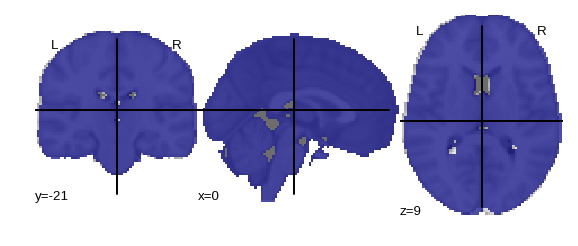

In [7]:
plotting.plot_roi(masker.mask_img_);

### Extracting data and putting  them into a table

In [8]:
def makeBigDf(imgList,masker):
    bigDf = pd.DataFrame()
    for img in imgList:
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s-%s' % (num,content)
        thisDf = pd.DataFrame(masker.transform(img))
        thisDf.index = [[cond],[cont]]
        bigDf = pd.concat([bigDf,thisDf])
    
    return bigDf

In [9]:
trainingDf = makeBigDf(trainingList,masker)

In [10]:
trainingDf

0         1         2         3         4       \
faces    004-family       -0.014855 -0.024355 -0.027687 -0.038244 -0.043698   
         007-friends       0.039879  0.048562  0.045989  0.044050  0.053268   
         013-movieactors  -0.017098 -0.003029  0.012788 -0.004869  0.008069   
         016-athletes      0.014403  0.030208  0.031041  0.016924  0.030390   
         024-tvactors     -0.059488 -0.045062 -0.038207 -0.052990 -0.046659   
         029-politicians   0.175263  0.160685  0.130618  0.191024  0.171995   
         033-lectureres    0.084158  0.086470  0.067347  0.078017  0.078071   
         036-teachers     -0.316378 -0.257089 -0.171713 -0.329105 -0.261805   
         042-family        0.077669  0.083928  0.075971  0.099875  0.106373   
         047-friends      -0.075450 -0.073649 -0.062537 -0.084905 -0.083546   
language 002-animals      -0.142396 -0.131228 -0.121068 -0.134855 -0.129466   
         006-tools        -0.020244 -0.019242 -0.019718 -0.069268 -0.069323   
         012-cities       -0.012526 -0.008699 -0.001112  0.009196  0.011046   
         018-countries    -0.088297 -0.088354 -0.090098 -0.112259 -0.116504   
         021-occupations   0.033783  0.024877  0.008248  0.037207  0.028291   
         028-fruits       -0.048764 -0.068557 -0.075046 -0.064613 -0.086334   
         034-clothing     -0.003983 -0.012891 -0.020012  0.008355 -0.003304   
         039-vegetables   -0.107487 -0.080969 -0.036537 -0.138516 -0.121899   
         044-furniture    -0.042130 -0.041882 -0.042831 -0.058676 -0.060160   
         048-colors       -0.002959 -0.012495 -0.024622 -0.000938 -0.009005   
motor    005-badminton     0.049163  0.039504  0.026184  0.051281  0.042552   
         010-tennis       -0.046340 -0.071818 -0.098419 -0.026589 -0.053292   
         015-swimming     -0.104208 -0.095929 -0.075849 -0.085378 -0.079494   
         020-soccer        0.024488 -0.001562 -0.003851  0.036457  0.003897   
         025-highjump     -0.082450 -0.088737 -0.078928 -0.105719 -0.102011   
         030-climbing     -0.009813 -0.016283 -0.025030 -0.001519 -0.006817   
         035-huerdlerace  -0.193711 -0.152289 -0.074525 -0.234243 -0.181042   
         040-archery      -0.059648 -0.041449 -0.020979 -0.066441 -0.042687   
         045-ropeskipping  0.128563  0.121458  0.103920  0.141000  0.134892   
         050-juggling      0.296871  0.265031  0.196686  0.340038  0.290687   
rest     001-rest         -0.074891 -0.047138 -0.026351 -0.070407 -0.040189   
         009-rest          0.107405  0.101262  0.094894  0.091795  0.087839   
         014-rest          0.101808  0.115414  0.115091  0.147143  0.150698   
         019-rest          0.080877  0.059017  0.038219  0.084107  0.062782   
         023-rest          0.018406  0.050442  0.064114 -0.005505  0.033575   
         027-rest          0.102956  0.102810  0.097533  0.136710  0.132491   
         031-rest          0.081747  0.062045  0.033709  0.060634  0.043437   
         037-rest         -0.154840 -0.131709 -0.099935 -0.171588 -0.141749   
         043-rest         -0.020974 -0.009851 -0.000733 -0.022217 -0.007715   
         046-rest         -0.046426 -0.043535 -0.024479 -0.082196 -0.067649   
spatial  003-citysquare    0.072830  0.061535  0.057645  0.065341  0.059341   
         008-market        0.098370  0.083839  0.070983  0.113654  0.097646   
         011-tramstation   0.010832  0.000137  0.001034 -0.006973 -0.011596   
         017-trainstation  0.027555  0.016808  0.016023  0.024159  0.019930   
         022-school        0.002312  0.008807  0.008743  0.010403  0.015416   
         026-church        0.223630  0.188620  0.125171  0.268114  0.221804   
         032-basement     -0.041100 -0.046069 -0.050791 -0.060103 -0.073092   
         038-promenade    -0.163325 -0.177723 -0.180129 -0.162763 -0.162859   
         041-cityofkiel   -0.117256 -0.090441 -0.047598 -0.122760 -0.089177   
         049-univesity     0.187252  0.150620  0.097614  0.218440  0.170987   


In [11]:
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [12]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.009190,0.000667,0.006361,-0.008022,0.001246,-0.015660,-0.006670,-0.000523,-0.005715,-0.004810,...,-0.010532,-0.015145,0.003356,-0.007788,-0.015298,-0.018877,0.013539,0.001342,-0.006435,0.004723
language,-0.043500,-0.043944,-0.042280,-0.052437,-0.055666,-0.044689,-0.050390,-0.053713,-0.040270,-0.012379,...,-0.029957,-0.030430,-0.025893,-0.005730,0.003045,0.003760,-0.035415,-0.014916,-0.005968,-0.014486
motor,0.000291,-0.004207,-0.005079,0.004889,0.000669,0.013782,0.008536,0.003935,0.011485,0.019878,...,0.014953,0.026591,-0.020739,-0.025195,-0.024513,-0.021705,-0.008296,-0.011598,-0.009594,0.003931
rest,0.019607,0.025876,0.029206,0.016848,0.025352,-0.002390,0.006009,0.015615,-0.009085,0.022037,...,-0.004928,-0.019125,0.020533,0.025296,0.027571,0.028363,0.004747,0.005455,0.004201,-0.017883
spatial,0.030110,0.019613,0.009869,0.034751,0.024840,0.043088,0.037274,0.029685,0.037395,-0.024724,...,0.021249,0.026244,0.020824,0.011342,0.007505,0.007904,0.023498,0.018028,0.017178,0.022385


### make Mask

In [13]:
def makeMasks(meanDf,pc):
    roiDict = {}
    
    # because we will edit the dataframe, we first make a deep copy
    copyDf = meanDf.copy()

    for cond in copyDf.index:

        thisCond = copyDf.ix[cond]
        
        # identify only cells that are above a certian percentile for that condition
        thisPercentile = np.percentile(thisCond,pc)
        
        # binarize the map at that percentile
        thisCond[thisCond>=thisPercentile]=999999
        thisCond[thisCond<999999] = 0
        thisCond[thisCond>0] = 1

        roiDict[cond] = thisCond
    
    roiDf = pd.DataFrame(roiDict).T
    
    return roiDf

In [14]:
def mergeRois(roiDf):
    
    copyDf = roiDf.copy()
    # add up the five masks
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # binarize the summary mask
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    
    return sumDf.T

In [15]:
def makeMasker(voxelPc,smoo,imgList=trainingList,masker=masker):
    # get the data
    blockDf = makeBigDf(imgList,masker)
    # get all training data for mask creation
    meanDf = blockDf.groupby(level=0).mean()
    # make the 5 masks
    roiDf = makeMasks(meanDf,voxelPc)
    # merge the 5 masks
    thisBigRoi = mergeRois(roiDf)
    # make mask image
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # make masker object from mask + the setting of a smoothing kernel
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=smoo).fit()
    
    return roiMasker

In [16]:
roiMasker = makeMasker(99,0)

In [17]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fb2f6b4d890>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

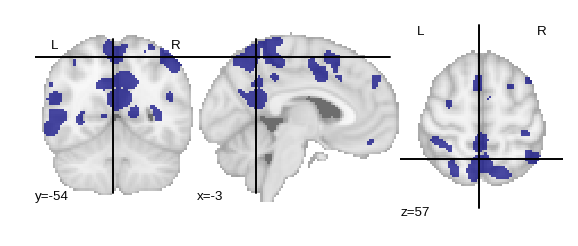

In [18]:
plotting.plot_roi(roiMasker.mask_img_)

## predict test data

In [19]:
trainingDf = makeBigDf(trainingList,roiMasker)

In [20]:
trainingDf.shape

(50, 11025)

In [21]:
trainingDf

0         1         2         3         4      \
faces    004-family       -0.508922 -0.430495 -0.463690  0.595018 -0.472822   
         007-friends      -0.473313 -0.388525  0.150142  0.607543 -0.524587   
         013-movieactors  -0.648244 -0.770180 -0.977148 -0.096664 -0.725534   
         016-athletes     -0.064868 -0.035615 -0.012362  1.176524 -0.043713   
         024-tvactors     -0.093735 -0.025866  0.070429  1.194132 -0.077919   
         029-politicians   0.210356  0.147825 -0.095647  0.732434  0.142854   
         033-lectureres    0.161206  0.096387  0.256376  1.100385  0.175259   
         036-teachers     -0.002432 -0.049186 -0.764320  0.289718 -0.125405   
         042-family       -0.103346 -0.126568  0.087796  0.061173 -0.088556   
         047-friends      -0.360751 -0.375327 -0.331440  1.340103 -0.345569   
language 002-animals       0.154115  0.211451  0.035488  0.654125  0.182592   
         006-tools         0.640004  0.577722  0.731258 -0.332466  0.602224   
         012-cities        0.450240  0.452828  0.372904 -0.092990  0.458652   
         018-countries     0.069880  0.077333 -0.044253 -0.087661  0.073007   
         021-occupations   0.832993  0.830748  0.645714  0.874127  0.879324   
         028-fruits        0.419631  0.499564  0.583269  0.263838  0.490698   
         034-clothing      0.454708  0.486777  0.259596 -0.338724  0.442761   
         039-vegetables    0.905594  0.920969  0.755600  0.681238  0.994041   
         044-furniture     0.163151  0.148992  0.606590  0.716669  0.287624   
         048-colors        0.977570  0.945133  0.852754  0.105649  1.003002   
motor    005-badminton     0.432061  0.376116  0.148636 -0.172586  0.445341   
         010-tennis       -0.347584 -0.371676 -0.217101  0.724066 -0.340240   
         015-swimming     -0.544522 -0.566075 -0.241412  0.156606 -0.519103   
         020-soccer       -0.270458 -0.245896 -0.456396  0.730937 -0.251201   
         025-highjump      0.524303  0.457175  0.128422 -0.667590  0.507172   
         030-climbing      0.096855  0.084754  0.111440 -1.056337  0.116914   
         035-huerdlerace  -0.046422 -0.009558 -0.349459 -0.750438 -0.134525   
         040-archery      -0.209789 -0.249041 -0.327539  0.290592 -0.310952   
         045-ropeskipping  0.113925  0.080123  0.030343 -0.451035  0.061774   
         050-juggling     -0.074180  0.033356  0.329701 -1.065034 -0.104985   
rest     001-rest          0.111477  0.131862  0.020791 -0.608265  0.160770   
         009-rest          0.237501  0.246704  0.089713 -0.082528  0.231201   
         014-rest         -0.355404 -0.295453 -0.244010 -0.682304 -0.331629   
         019-rest         -0.821859 -0.798123 -0.389591  0.066486 -0.839113   
         023-rest          0.340105  0.323689  0.349262 -1.075810  0.351014   
         027-rest          0.584764  0.640441  0.592013 -0.452867  0.578439   
         031-rest         -0.475444 -0.570100 -0.544209  0.455397 -0.458992   
         037-rest         -0.590733 -0.623125 -0.775451 -0.732489 -0.560458   
         043-rest         -0.114103 -0.086867 -0.021242 -0.394772 -0.107017   
         046-rest         -0.260061 -0.275125 -0.461545  0.185071 -0.297004   
spatial  003-citysquare    0.187599  0.082838 -0.099974 -0.116386  0.100997   
         008-market       -0.086056 -0.072361 -0.190287 -0.923330 -0.076118   
         011-tramstation   0.104579  0.181014  0.402437 -0.175967  0.131005   
         017-trainstation  0.297499  0.297306  0.214554 -0.428831  0.271825   
         022-school       -0.354163 -0.376493 -0.235718 -0.887281 -0.385857   
         026-church       -0.494137 -0.423709  0.170058 -0.441100 -0.482690   
         032-basement     -0.375131 -0.357997 -0.088335  0.281907 -0.346405   
         038-promenade    -0.748298 -0.749794 -0.590013 -0.009515 -0.717761   
         041-cityofkiel    0.540850  0.496440  0.181509  0.113790  0.546987   
         049-univesity    -0.570714 -0.525344 -0.343873 -0.441242 -0.574689   



In [22]:
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [23]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024
faces,-0.188405,-0.195755,-0.207987,0.700037,-0.208599,-0.220722,-0.250206,-0.187005,-0.187359,-0.196359,...,0.192631,0.179101,0.154325,0.128452,0.133966,0.344792,0.537049,0.507729,0.482527,0.144543
language,0.506788,0.515152,0.479892,0.244381,0.541393,0.519334,0.541931,0.556080,0.556703,0.576153,...,0.693892,0.888516,0.816893,0.810485,0.600241,0.379016,0.584442,0.559284,0.643294,0.056042
motor,-0.032581,-0.041072,-0.084336,-0.226082,-0.052981,-0.030411,-0.028274,-0.064838,-0.062806,-0.072826,...,-0.436837,-0.162871,-0.097210,-0.094950,-0.001045,-0.487006,-0.213283,-0.132702,-0.136603,-0.134005
rest,-0.134376,-0.130610,-0.138427,-0.332208,-0.127279,-0.126482,-0.123410,-0.122740,-0.126339,-0.115060,...,-0.448992,-0.590633,-0.537892,-0.513936,-0.430073,-0.127932,-0.621259,-0.649239,-0.669632,0.139029
spatial,-0.149797,-0.144810,-0.057964,-0.302795,-0.153271,-0.151480,-0.153091,-0.174614,-0.173234,-0.183217,...,-0.007643,-0.305411,-0.326315,-0.318939,-0.288448,-0.108021,-0.301413,-0.297441,-0.328737,-0.149773


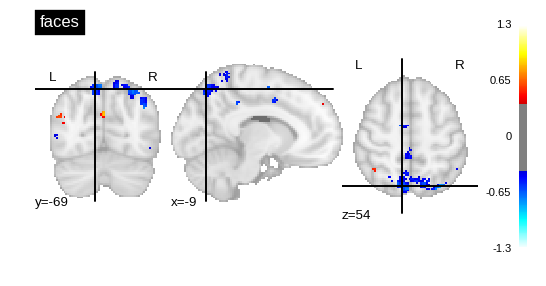

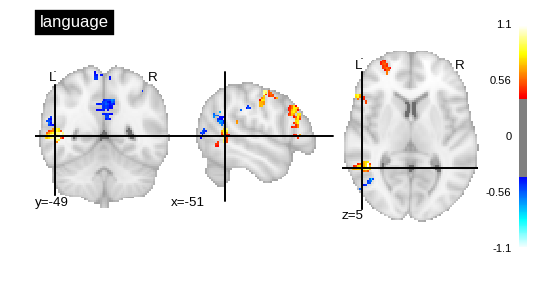

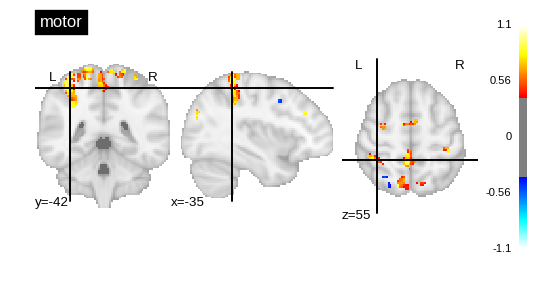

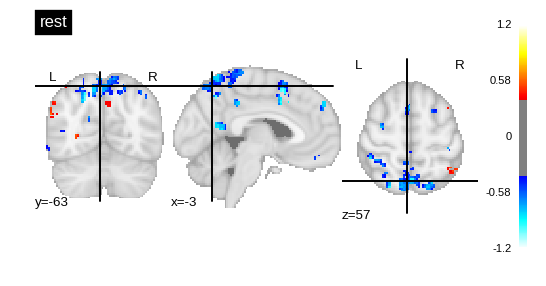

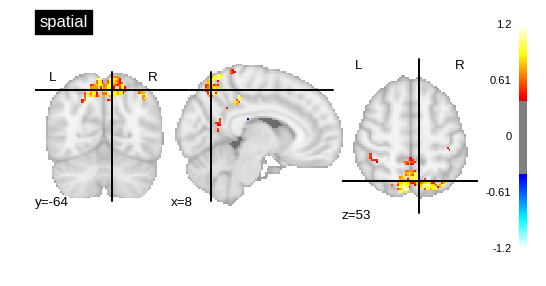

In [24]:
for cond in meanTrainingDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = roiMasker.inverse_transform(meanTrainingDf.ix[cond])
    plotting.plot_stat_map(thisIm,title=cond,threshold=.4,axes=ax1)
    plt.show()

In [25]:
def makeBigTestDf(imgList,masker):
    bigDf = pd.DataFrame()
    for img in imgList:
        thisName = img.split('/')[-1].split('.')[0]
        thisDf = pd.DataFrame(masker.transform(img))
        thisDf.index = [thisName]
        bigDf = pd.concat([bigDf,thisDf])
    
    return bigDf

In [26]:
testDf = makeBigTestDf(testList,roiMasker)

In [27]:
testDf.shape

(25, 11025)

In [28]:
testDf

,0,1,2,3,4,5,6,7,8,9,...,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024
A,0.156333,0.066734,-0.055847,-0.931856,0.136280,0.052333,-0.032798,0.162228,0.149705,0.030791,...,0.123633,-0.148938,-0.186293,-0.248440,-0.162861,1.006065,0.859017,0.667228,0.561870,-0.458541
B,-0.735554,-0.707860,-0.514222,1.298323,-0.709339,-0.705357,-0.710256,-0.696018,-0.682859,-0.590596,...,0.383766,0.405544,0.299545,0.319363,-0.054257,0.262914,0.078308,0.021534,0.062826,-0.257833
C,0.075175,0.048161,0.231946,0.508769,0.113602,0.061396,0.116858,0.186045,0.193396,0.183694,...,-0.184801,1.044672,1.169060,1.100821,0.635178,1.043067,1.679587,1.595206,1.605144,-0.263339
D,-0.282685,-0.226300,-0.357233,-0.750901,-0.323303,-0.301565,-0.249062,-0.293589,-0.294768,-0.266045,...,-0.968713,-1.114786,-0.925355,-0.937526,-0.102412,0.489792,-0.402681,-0.624166,-0.700224,0.691124
E,-0.192888,-0.196865,-0.256040,0.061011,-0.125242,-0.023195,0.002261,-0.171693,-0.175705,-0.212227,...,-0.649808,-0.134477,0.027471,0.023732,0.267320,-0.276095,-0.247477,-0.210014,-0.174937,0.309501
F,0.322520,0.404614,0.523403,0.564703,0.385016,0.498293,0.429852,0.341385,0.346423,0.448246,...,0.859573,0.884262,0.674766,0.735732,0.779595,-0.436120,-0.017078,0.142314,0.247792,0.833336
G,0.466098,0.427304,-0.096933,-0.533634,0.516998,0.392608,0.365861,0.534924,0.535286,0.506720,...,0.270682,-0.263198,-0.349337,-0.367945,-0.657911,-0.088907,0.050774,0.098401,0.033175,-0.218236
H,0.133766,0.114637,-0.166031,-0.221302,0.123144,0.075585,0.102279,0.113926,0.112392,0.089787,...,-0.262566,0.480613,0.569172,0.551227,0.255981,1.167165,0.739313,0.493910,0.518821,-0.201980
I,-0.329418,-0.313266,-0.335616,0.864882,-0.386445,-0.263418,-0.179242,-0.405841,-0.402410,-0.405722,...,-0.240524,0.053175,0.114823,0.155791,0.561570,-0.014801,-0.267495,-0.317088,-0.249353,0.563526
J,0.193820,0.117661,0.215136,-0.608907,0.179747,0.156232,0.152686,0.155955,0.154919,0.063743,...,-0.261380,-0.203233,-0.166967,-0.150089,-0.113996,0.431569,-0.175546,-0.361849,-0.345477,0.191757


In [29]:
blockCorrDf = pd.DataFrame(np.corrcoef(trainingDf,testDf)[50:,:50],
                           index=testDf.index,
                           columns=trainingDf.index)

In [30]:
myOrder = ['language','motor','spatial','faces','rest']
#blockCorrDf = blockCorrDf.reindex(myOrder,level=0)
blockCorrDf = blockCorrDf[myOrder]

In [31]:
blockCorrDf

language                                                                \
  002-animals 006-tools 012-cities 018-countries 021-occupations 028-fruits   
A   -0.053318 -0.287773  -0.155678     -0.059489       -0.136907  -0.126644   
B    0.125755  0.145681   0.099660      0.100055        0.086229   0.103654   
C    0.272761  0.308755   0.318071      0.184737        0.506269   0.422169   
D   -0.178510 -0.043209  -0.215578     -0.079388       -0.277547  -0.050902   
E   -0.133095 -0.279995  -0.513313      0.091996       -0.407772  -0.092629   
F    0.605720  0.516941   0.466952      0.551571        0.498703   0.650883   
G   -0.034979 -0.137117   0.093744     -0.142140       -0.035132  -0.145506   
H   -0.314587 -0.102267  -0.240044     -0.220676       -0.267265  -0.191829   
I   -0.063212  0.007502  -0.022435     -0.080202       -0.031946  -0.070669   
J   -0.238824 -0.425086  -0.302827     -0.229188       -0.367614  -0.370528   
K    0.104791  0.193974   0.038989      0.323028       -0.064692   0.172837   
L   -0.238013  0.006119   0.093587     -0.371613       -0.067943  -0.230873   
M   -0.222529  0.040744   0.045356     -0.304853       -0.013893  -0.177624   
N   -0.236974 -0.400441  -0.515875     -0.065799       -0.496077  -0.271469   
O   -0.309214 -0.126291  -0.069237     -0.419179       -0.174201  -0.414387   
P    0.196666  0.224839   0.244820      0.251218        0.351081   0.208035   
Q   -0.298389 -0.340566  -0.449558     -0.084585       -0.319941  -0.305173   
R   -0.301152 -0.434274  -0.239268     -0.392232       -0.266640  -0.490751   
S    0.442158  0.521674   0.500867      0.374380        0.614445   0.596588   
T   -0.187496 -0.319098  -0.426735      0.091752       -0.393966  -0.226428   
U    0.095014  0.104631   0.319238     -0.126989        0.332870   0.038233   
V   -0.223017 -0.085575  -0.024582     -0.368776       -0.122075  -0.249167   
W    0.431270  0.655425   0.560798      0.298579        0.663557   0.582752   
X    0.613327  0.642735   0.547610      0.522560        0.535795   0.735929   
Y    0.124670 -0.190697  -0.071008      0.154677       -0.110147  -0.010949   

                                                          ...         rest  \
  034-clothing 039-vegetables 044-furniture 048-colors    ...     001-rest   
A    -0.533947      -0.005386     -0.171981  -0.086967    ...     0.027856   
B     0.073107      -0.037666      0.169105  -0.130502    ...    -0.032619   
C     0.052516       0.332618      0.166383   0.145560    ...    -0.103049   
D     0.226253      -0.433379     -0.081543  -0.208115    ...     0.137256   
E    -0.128999      -0.142658     -0.288567   0.151049    ...     0.006064   
F     0.305590       0.543168      0.571978   0.523934    ...    -0.192483   
G    -0.347446      -0.087320     -0.012823  -0.201436    ...     0.121054   
H     0.191858      -0.298123     -0.160579  -0.197886    ...     0.134047   
I     0.151033      -0.099962      0.023588  -0.193596    ...    -0.017266   
J    -0.511942      -0.178622     -0.265924  -0.183850    ...     0.076155   
K     0.259579       0.117729      0.248212   0.350194    ...    -0.000759   
L     0.265167      -0.310857      0.060953  -0.366122    ...     0.130357   
M     0.234938      -0.259103      0.017258  -0.321601    ...     0.140690   
N    -0.139950      -0.196259     -0.276520   0.042967    ...     0.016436   
O     0.128092      -0.332207     -0.111189  -0.394892    ...     0.121025   
P     0.108410       0.260895      0.048798   0.130818    ...    -0.140139   
Q    -0.060489      -0.169615     -0.571691   0.053689    ...     0.008474   
R    -0.325988      -0.182548     -0.280985  -0.149950    ...     0.061150   
S     0.186674       0.560593      0.254654   0.405446    ...    -0.147535   
T    -0.280942      -0.108443     -0.368819   0.041803    ...    -0.030125   
U    -0.005849       0.004154      0.017338  -0.240433    ...    -0.111338   
V     0.162303      -0.276825      0.039403  -0.384010    ...     0.156176   

### show all block-wise  correlations

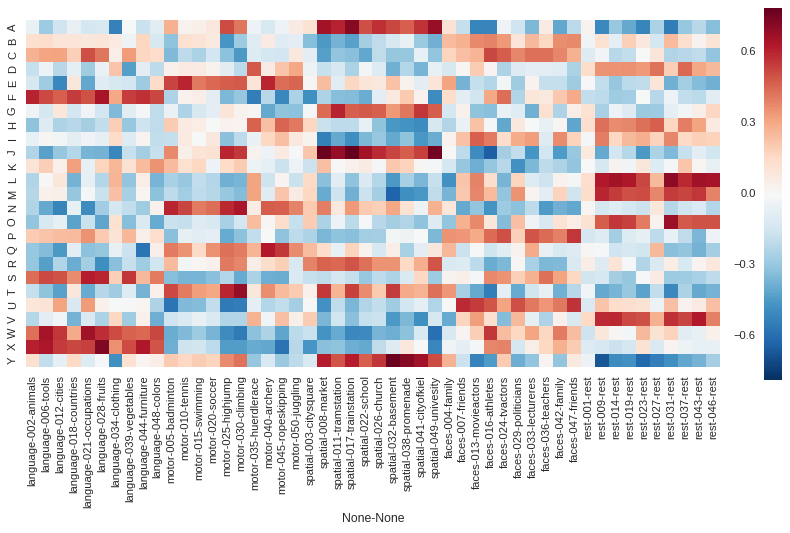

In [32]:
fig,ax1 = plt.subplots(figsize=(14,6))

sns.heatmap(blockCorrDf,annot=False,square=True,ax=ax1)
sns.despine(left=True,bottom=True)
plt.show()

Get highest correlation, to control colorbar range

In [33]:
myMax=abs(blockCorrDf).max().max()

In [34]:
myMax

0.7860775967105489

In [35]:
thisMax = (myMax+0.05).round(1)

In [36]:
thisMax

0.8

### accentuate the 10 highest correlations

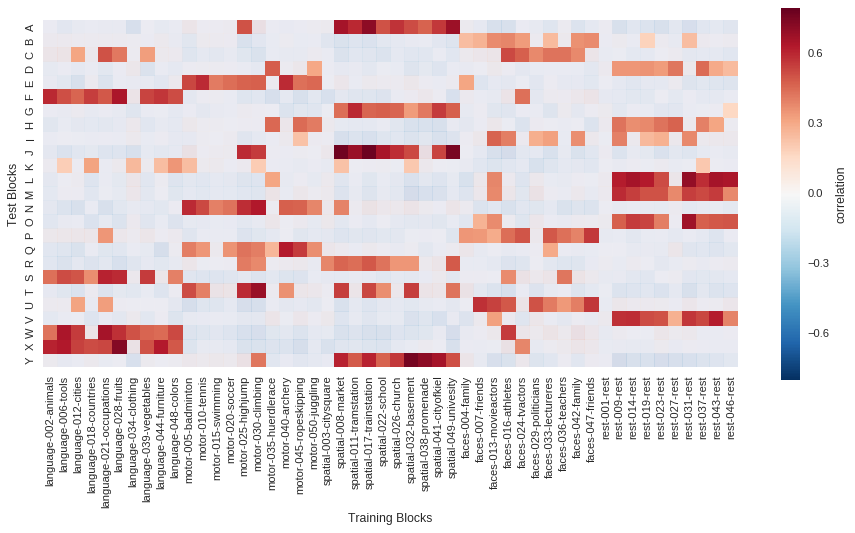

In [37]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr10 = blockCorrDf.loc[i].sort_values(ascending=False)[9]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]>=nr10 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')

plt.show()

### accentuate the highest correlation

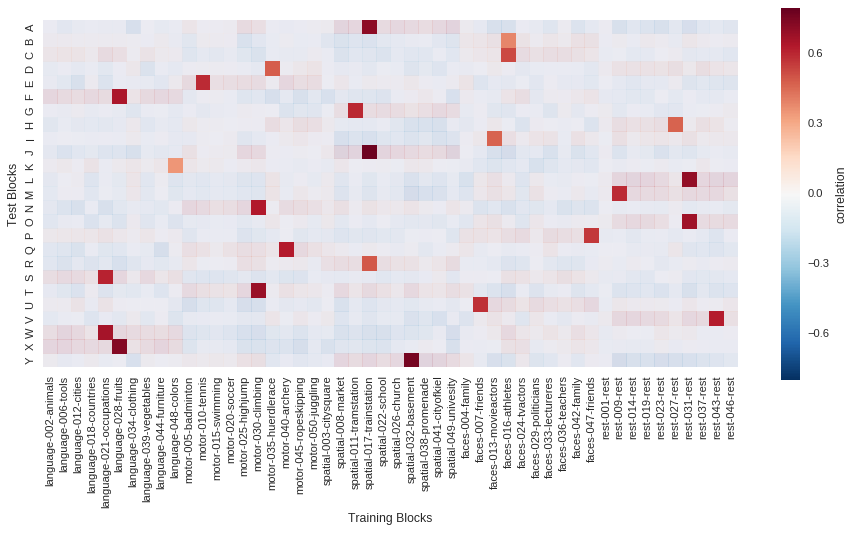

In [38]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr1 = blockCorrDf.loc[i].sort_values(ascending=False)[0]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]==nr1 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')

plt.show()

### show predictions based on highest individual correlation

In [39]:
d = {}
for i in blockCorrDf.index:
    thisDf = blockCorrDf.loc[i]
    cond,content = thisDf.idxmax()
    d[i] = {'condition':cond,'content':content}
df = pd.DataFrame(d).T
df

,condition,content
A,spatial,017-trainstation
B,faces,016-athletes
C,faces,016-athletes
D,motor,035-huerdlerace
E,motor,010-tennis
F,language,028-fruits
G,spatial,011-tramstation
H,rest,027-rest
I,faces,013-movieactors
J,spatial,017-trainstation


### correlate with training data averaged by condition

In [40]:
myCorrDf = pd.DataFrame(np.corrcoef(meanTrainingDf,testDf)[5:,:5],
                       index=testDf.index,
                       columns=meanTrainingDf.index)

In [41]:
myOrder = ['language','motor','spatial','faces','rest']
#myCorrDf = myCorrDf.reindex(myOrder,level=0)
myCorrDf = myCorrDf[myOrder]

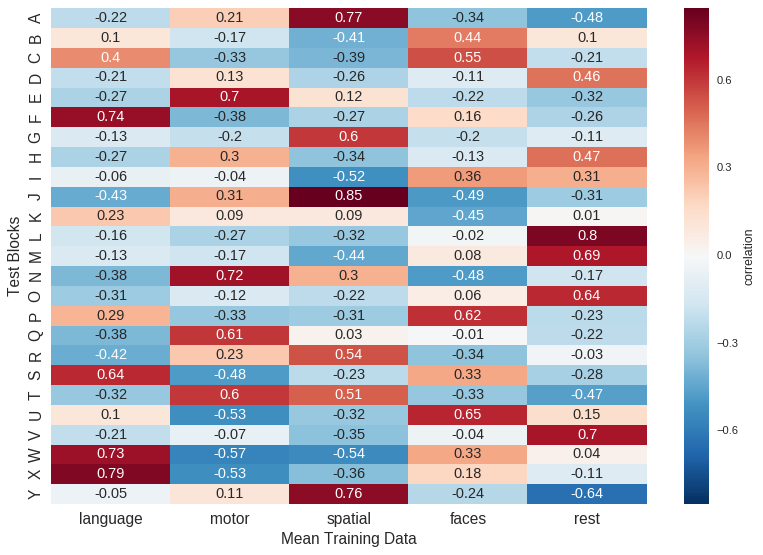

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(myCorrDf.round(2),annot=True,
            cbar_kws={"label":"correlation"},
            annot_kws={"fontsize": 13} )

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Training Data',fontsize=14)
plt.ylabel('Test Blocks',fontsize=14)

plt.show()

### decision rule (winner take all)

In [43]:
def makeCorrPred(myCorrDf):
    d = {}
    for a in myCorrDf.index:
        thisDf = myCorrDf.loc[a]
        winner = thisDf.idxmax()
        d[a] = {'winner':winner  }
        
    predDf = pd.DataFrame(d).T

    return predDf

In [44]:
corrPredDf = makeCorrPred(myCorrDf)

In [45]:
corrPredDf

,winner
A,spatial
B,faces
C,faces
D,rest
E,motor
F,language
G,spatial
H,rest
I,faces
J,spatial


### Unblinding  

Uncomment this to compare predictions with real labels. This loads the codeList that was created when the labels were asasigned (cf. cell 3 of this notebook)

In [46]:
#codeDf = pd.read_csv('../blindTest/codeList.csv',index_col=[2],header=0)
#checkDf = pd.concat([ codeDf,corrPredDf ],axis=1).sort_values(by='filename')
#checkDf